In [21]:
import pandas as pd 
from konlpy.tag import Okt 
import nltk 
import requests
from bs4 import BeautifulSoup as bs    
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings('ignore')

In [2]:
driver=webdriver.Chrome('./chromedriver.exe')
url='https://www.korea.kr/totalSearch.do?srchFlag=N&keyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&oldKeyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&resultKeyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&sort=date&scnt=1&punit=10&where=news_korea_new_v2&dateRange=all&range=ALL&op=and&multiFlag=Y&news_type=pol'
driver.get(url)
time.sleep(2)
res=[bs(driver.page_source,'html.parser')]

for page in range(2,15):
    if page%10==0:
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
        driver.find_element(By.XPATH,'//*[@id="paging"]/div/a[3]').click()
        
    else: 
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
        
driver.close()
driver.quit()

#제목과 링크를 판다스 df로 만들었음
result=[]
for j in res:
    for i in j.select('span.text>strong>a'):
        result.append({
            '제목':i.text.replace('\t',''),
            '링크':'https://www.korea.kr'+i['href']
        })

df=pd.DataFrame(result)
display(df)


,제목,링크
0,\n기업가형 소상공인 육성하고 행복한 로컬상권 조성한다\n,https://www.korea.kr/news/policyNewsView.do?ne...
1,\n코로나 피해 자영업자·소상공인 맞춤형 금융지원 25일부터 시행\n,https://www.korea.kr/news/policyNewsView.do?ne...
2,\n올해 세무조사 역대 최저 수준으로 축소…홈택스 전면 개편\n,https://www.korea.kr/news/policyNewsView.do?ne...
3,\n외식산업에 5년간 1조원 투자…미래 성장산업으로 육성\n,https://www.korea.kr/news/policyNewsView.do?ne...
4,\n코로나19 온전한 손실 보상…감염병 대응체계 고도화\n,https://www.korea.kr/news/policyNewsView.do?ne...
...,...,...
135,\n저소득 근로자 월세도 40% 소득공제\n,https://www.korea.kr/news/policyNewsView.do?ne...
136,\n한통의 문자서비스에 엄마는 안심\n,https://www.korea.kr/news/policyNewsView.do?ne...
137,\n일자리 정책 실효성 따져 보완대책 마련\n,https://www.korea.kr/news/policyNewsView.do?ne...
138,\n영세자영업자 경영안정 10조9000억 투입\n,https://www.korea.kr/news/policyNewsView.do?ne...


In [3]:
res_a=[]
for i in df['링크']:
    html=requests.get(i)
    soup=bs(html.text,'html.parser')
    
    title=soup.select_one('div.article-head>h1').text
    date=soup.select('div.info>span')[0].text
    writer=soup.select('div.info>span')[1].text.replace('\t','').replace('\r','')
    contents=soup.find('div','view-cont').text.replace('\n','').replace('\t','').replace('\r','')
    res_a.append([title,date,writer,contents])
#     break

df=pd.DataFrame(res_a)
df.columns=['제목','날짜','작성자','내용']
df

,제목,날짜,작성자,내용
0,기업가형 소상공인 육성하고 행복한 로컬상권 조성한다,2022.08.25,중소벤처기업부,정부가 우리동네 소상공인을 성장하는 혁신기업가로 육성하기 위해 스마트·디지털 기반 ...
1,코로나 피해 자영업자·소상공인 맞춤형 금융지원 25일부터 시행,2022.07.25,금융위원회,금융당국이 총 80조원 규모의 자영업자·소상공인 맞춤형 금융지원 프로그램을 25일부...
2,올해 세무조사 역대 최저 수준으로 축소…홈택스 전면 개편,2022.07.22,국세청,국세청이 복합 경제위기 상황 등을 고려해 올해 역대 최저 수준으로 세무조사를 감축한...
3,외식산업에 5년간 1조원 투자…미래 성장산업으로 육성,2022.07.20,농림축산식품부,"지난 7일 오후 서울 시내 식당가 모습. (사진=저작권자(c) 연합뉴스, 무단 전재..."
4,코로나19 온전한 손실 보상…감염병 대응체계 고도화,2022.05.24,정책브리핑 김차경,"5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 사는..."
...,...,...,...,...
135,저소득 근로자 월세도 40% 소득공제,2009.08.20,기획재정부,무주택 근로자의 주거안정 지원을 위해 저소득 무주택 근로자가 월세를 사는 경우 월세...
136,한통의 문자서비스에 엄마는 안심,2009.08.10,글·사진:위클리공감,정부는 국민들의 생활 속 불편 해소와 경제 안정에 도움을 주기 위해 다각적인 생활공...
137,일자리 정책 실효성 따져 보완대책 마련,2009.06.25,기획재정부,정부는 일자리 창출과 서민생활 안정을 위한 정책들을 하반기에도 여전히 중요 추진과제...
138,영세자영업자 경영안정 10조9000억 투입,2009.04.03,국무총리실,내수 경기침체와 과당경쟁으로 휴·폐업 위...


In [4]:
df.to_csv('./정책브리핑_유지아.csv')

In [5]:
df=pd.read_csv('./정책브리핑_유지아.csv')
df=df[:100]

In [6]:
contents=[]
for i in df.index:
    contents.append(df['내용'][i])
contents

['금융당국이 총 80조원 규모의 자영업자·소상공인 맞춤형 금융지원 프로그램을 25일부터\xa0가동한다.일상회복 과정에서 코로나19 대응 긴급·일시적 조치가 종료 되더라도 자영업자 등이 금융애로가 없도록 선제적·종합적으로 대응해 나가기 위해서다.이를위해 상환능력이 있는 차주에 대해 유동성 및 경쟁력 제고 지원자금을 41조 2000억원 규모로 공급한다.고금리 부담으로 어려움을 겪는 차주에는 8조 5000억원 규모의 저금리 대환상품을 제공한다.자력으로 상환이 어려운 차주에 대해서는 30조원 규모의 새출발기금을 통해 원리금 감면 등 채무조정을 지원한다.이 중 8조 5000억원 규모의 저금리 대환상품과 30조원 규모의 새출발기금을 통한 채무조정과 관련한 세부 내용은 다음달 중 발표할 예정이다.24일 금융위원회가\xa0먼저 세부 내용을 공개한 41조 2000억원의 정책자금은 ▲유동성 공급 10조 5000억원 ▲경쟁력 강화 29조 7000억원 ▲재기지원 1조원으로 구성됐다.먼저 유동성 공급은 특례보증, 금리 부담 경감 프로그램 등의 형식으로 지원된다.코로나19 피해 등을 입은 자영업자와 소상공인을 대상으로 5조 4000억원 규모로 유동성 지원을 실시한다. 이중 신보가 25일부터 코로나로 직접적 피해를 입은 업체에 3조 2500억원 규모의 특례보증을 지원한다.나머지 2조 1000억원은 기은과 신보가 매출감소·재무상황 악화 등으로 자금이 필요한 업체에 공급한다.올해 1월 도입한 고신용자 희망대출플러스의 지원효과를 높이기 위해 지원한도와 대상도 확대한다.고신용자 희망대출플러스는 코로나19피해 소상공인을 대상으로 1.5% 초저금리 대출을 지원하는 것으로, 지원 한도를 기존 1000만원에서 3000만원으로 대폭 확대하고, 지원대상을 지난 5월 시행한 손실보전금 수급자까지 추가하기로 했다.기은의 대출금리 인하 프로그램도 개편·신설한다. 영세 소상공인 전용 프로그램인 해내리대출을 3조원 추가 공급하고, 코로나19 피해 업체와 소상공인진흥공단 등으로부터 컨설팅을 받은 업체에 최대 1.

In [25]:
df1=pd.DataFrame(contents)
df1

,0
0,금융당국이 총 80조원 규모의 자영업자·소상공인 맞춤형 금융지원 프로그램을 25일부...
1,국세청이 복합 경제위기 상황 등을 고려해 올해 역대 최저 수준으로 세무조사를 감축한...
2,"지난 7일 오후 서울 시내 식당가 모습. (사진=저작권자(c) 연합뉴스, 무단 전재..."
3,"5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 사는..."
4,2021년 9월 9개 정부 부처(고용노동부·국토교통부·교육부·금융위원회·기획재정부·...
...,...
95,최경환 부총리 겸 기획재정부 장관은 24일 “임금피크제 적용 근로자에 대한 지원을 ...
96,차량공유 서비스 앱으로 12억달러(1조2000억원)의 투자를 유치한 ‘우버(UBER...
97,정부가 서민경제 회복과 골목상권 활성화를 위해 내년부터 2조원 규모의 ‘소상공인시장...
98,최경환 부총리 겸 기획재정부 장관이 26일 정부서울청사에서 ‘민생안정과 경제활성화 ...


In [63]:
okt=Okt()
words=[]
for index,value in enumerate(contents):
    words.append(okt.nouns(contents[index]))
print(words)

[['금융', '당국', '총', '규모', '자영', '업자', '소상', '공인', '맞춤', '금융', '지원', '프로그램', '가동', '일상', '회복', '과정', '코로나', '대응', '긴급', '일시', '조치', '종료', '자영', '업자', '등', '금융', '애로', '선제', '종합', '대응', '위', '위해', '상환', '능력', '차주', '대해', '유동성', '및', '경쟁력', '제', '자금', '규모', '공급', '금리', '부담', '어려움', '차주', '규모', '금리', '환', '상품', '제공', '자력', '상환', '차주', '대해', '규모', '출발', '기금', '통해', '원리금', '등', '채무', '조정', '지원', '이', '중', '규모', '금리', '환', '상품', '규모', '출발', '기금', '통한', '채무', '조정', '관련', '세부', '내용', '다음', '달', '중', '발표', '예정', '금융', '위원회', '먼저', '세부', '내용', '공개', '정책', '자금', '유동성', '공급', '경쟁력', '강화', '재기', '지원', '구성', '먼저', '유동성', '공급', '특례', '보증', '금리', '부담', '경감', '프로그램', '등', '형식', '지원', '코로나', '피해', '등', '자영', '업자', '상공', '대상', '규모', '유동성', '지원', '실시', '이중', '보가', '코로나', '직접', '피해', '업체', '규모', '특례보증', '지원', '나머지', '은', '보가', '매출', '감소', '재무', '상황', '악화', '등', '자금', '업체', '공급', '올해', '도입', '신용', '희망', '대출', '플러스', '원효', '위해', '한도', '대상', '확대', '신용', '희망', '대출', '플러스', '코로나', '피해', '상공', '대상', '초', '금리', '대출

In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

te=TransactionEncoder()
te_arry=te.fit(words).transform(words)
print(te_arry)
print(te.columns_)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]
['가게', '가격', '가계', '가계부채', '가공', '가공업', '가교', '가구', '가금', '가기', '가까이', '가능', '가능성', '가동', '가득', '가뜩이나', '가량', '가로', '가루약', '가맹', '가면', '가명', '가물', '가미', '가방', '가사', '가산', '가산금', '가상', '가상현실', '가성', '가속', '가솔린', '가수', '가스', '가스터빈', '가슴', '가시', '가액', '가야', '가업', '가용', '가운데', '가을', '가이드', '가이드라인', '가이드북', '가입', '가입자', '가장', '가장자리', '가전', '가전제품', '가점', '가정', '가족', '가중', '가지', '가처분소득', '가치', '가칭', '가파른', '가행위', '각', '각각', '각계', '각국', '각오', '각자', '각종', '각지', '각하', '간', '간다', '간담', '간문제', '간사', '간섭', '간소', '간소화', '간식', '간암', '간이', '간접', '간주', '간판', '간편', '간편식', '간호사', '갈래', '감', '감독', '감사', '감상', '감성', '감소', '감수', '감시', '감안', '감압', '감압과정', '감압하', '감액', '감염병', '감염증', '감정', '감지', '감지기', '감찰', '감초', '감축', '감치', '감탄', '감히', '갑', '갑오년', '

In [ ]:
df1=pd.DataFrame(te_arry, columns=te.columns_)
df1

In [ ]:
freq=apriori(df1,min_support=0.01,use_colnames=True)
freq

In [76]:
words=' '.join(words)
words

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한 기업 실패 원인 중소기업 가장 애로 사항 판매 부진 아이디어 창업 기술 개발 통한 창조 혁신 제품 판로 소비자 사장 경우 중소기업청 초기 창조 혁신 제품 시장 진입 아이디어 사업 판로 순환 창조경제 생태계 구현 위해 마케팅 이노베이션 지원 사업 시행 계획 확정 발표 사업 계획 신청 접수 시작 마케팅 이노베이션 사업 규모 개사 제품 소비자 반응 조사 대형 유통 상품 기획 현장 전문가 선정 평가 선별 지원 선정 모든 제품 대해 소비자 전문가 평가 통한 시장 조사 실시 혁신 제품 대해 마케팅 전략 수립 제품 개선 지원 정부 보조금 지원 조건 우대 사항 정부 지원 금액 정부 보조금 비중 고시 장성 조사 소비자 전문가 평가 마케팅 전략 수립 업체 부담 제품 개선 업체 부담 이번 사업 주요 특징 그간 마케팅 사업 칸막이 지원 제품 중심 종합 마케팅 지원 시스템 마련 통해 혁신 제품 시장 진입 공률 고하 도록 또한 시장 혁신 제품 발굴 시장 조사 기반 선정 시스템 구축 아이디어 혁신 제품 유통 시장 소비자 만날 접근성 제품 대한 시장 조사 참여 기업 대해 제품 전용 판매 입점 기회 제공 혁신 제품 선정 마케팅 전략 수립 이행 경우 마케팅 사업 참여 자격 부여 마케팅 지원 사업 방안 테스트 마켓 시장 검증 인지도 해외진출 백화점 정책 매장 제품 판매 고속도로 휴게소 시장 평가 상품 검증 백화점 민간 유통 입점 홈쇼핑 무료 방송 온라인 판촉 홍보 제품 홍보 프라자 미국 인니 해외 홈쇼핑 진출 사업 신청 자격 중소기업 기본 규정 중소기업 제조 위탁 생산 소비재 완제 다음 신청 자격 충족 지원 제외 사항 해당 경우 신청 신청 자격 개월 이내 국내 시장 유통 입점 생활 주방 가전 멀티미디어 차량 용품 제품군 참고 제품군 생활 가전 주방 가전 기기 멀티미디어 차량 용품 조명 기기 가구 의료기기 유아 용품 스포츠 용품 다만 사업 목적 수입 제품 해외 위탁 생산 제품 제품 건설 자재 부품 중간 

In [77]:
words[:50]

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한'

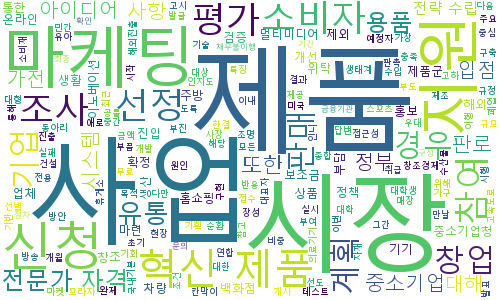

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

wc = WordCloud("C:/windows/fonts/malgun.ttf",
               background_color = "white",
               max_words = 200,
               width=500,
               height=300,
               prefer_horizontal=0.9
              )
wc = wc.generate(words) 

#matplotlib로 시작화(1)
wc.to_image()

In [72]:
wc.words_

{'제품': 1.0,
 '사업': 1.0,
 '시장': 0.8333333333333334,
 '마케팅': 0.8333333333333334,
 '지원': 0.75,
 '신청': 0.6666666666666666,
 '혁신 제품': 0.5833333333333334,
 '소비자': 0.4166666666666667,
 '조사': 0.4166666666666667,
 '선정': 0.4166666666666667,
 '평가': 0.4166666666666667,
 '참여': 0.4166666666666667,
 '창업': 0.3333333333333333,
 '기업': 0.3333333333333333,
 '판매': 0.3333333333333333,
 '경우': 0.3333333333333333,
 '계획': 0.3333333333333333,
 '유통': 0.3333333333333333,
 '전문가': 0.3333333333333333,
 '자격': 0.3333333333333333,
 '용품': 0.3333333333333333,
 '또한': 0.25,
 '중소기업': 0.25,
 '사항': 0.25,
 '아이디어': 0.25,
 '판로': 0.25,
 '대해': 0.25,
 '정부': 0.25,
 '시스템': 0.25,
 '입점': 0.25,
 '가전': 0.25,
 '전략 수립': 0.25,
 '마련': 0.16666666666666666,
 '통한': 0.16666666666666666,
 '창조': 0.16666666666666666,
 '중소기업청': 0.16666666666666666,
 '진입': 0.16666666666666666,
 '이노베이션': 0.16666666666666666,
 '확정': 0.16666666666666666,
 '상품': 0.16666666666666666,
 '개선': 0.16666666666666666,
 '보조금': 0.16666666666666666,
 '업체': 0.16666666666666666,
 '부담'

In [89]:
from collections import Counter
re=words.split(' ') 
cnt = Counter(re)
cnt_words=cnt.most_common()
cnt_words

[('제품', 19),
 ('사업', 12),
 ('시장', 10),
 ('마케팅', 10),
 ('지원', 9),
 ('신청', 8),
 ('혁신', 7),
 ('소비자', 5),
 ('조사', 5),
 ('선정', 5),
 ('평가', 5),
 ('참여', 5),
 ('창업', 4),
 ('기업', 4),
 ('판매', 4),
 ('경우', 4),
 ('계획', 4),
 ('유통', 4),
 ('전문가', 4),
 ('자격', 4),
 ('용품', 4),
 ('또한', 3),
 ('중소기업', 3),
 ('사항', 3),
 ('아이디어', 3),
 ('판로', 3),
 ('대해', 3),
 ('전략', 3),
 ('수립', 3),
 ('정부', 3),
 ('시스템', 3),
 ('입점', 3),
 ('가전', 3),
 ('마련', 2),
 ('통한', 2),
 ('창조', 2),
 ('중소기업청', 2),
 ('진입', 2),
 ('이노베이션', 2),
 ('확정', 2),
 ('상품', 2),
 ('개선', 2),
 ('보조금', 2),
 ('업체', 2),
 ('부담', 2),
 ('검증', 2),
 ('백화점', 2),
 ('정책', 2),
 ('홈쇼핑', 2),
 ('온라인', 2),
 ('홍보', 2),
 ('해외', 2),
 ('위탁', 2),
 ('생산', 2),
 ('제외', 2),
 ('생활', 2),
 ('주방', 2),
 ('멀티미디어', 2),
 ('차량', 2),
 ('제품군', 2),
 ('기기', 2),
 ('최근', 1),
 ('선도', 1),
 ('대학', 1),
 ('대학생', 1),
 ('동아리', 1),
 ('연합', 1),
 ('예정자', 1),
 ('대상', 1),
 ('결과', 1),
 ('한결', 1),
 ('답변', 1),
 ('실패', 1),
 ('원인', 1),
 ('가장', 1),
 ('애로', 1),
 ('부진', 1),
 ('기술', 1),
 ('개발', 1),
 ('사장', 1),
 ('초기', 1),

In [90]:
len(cnt_words)

180

In [93]:
df_word=pd.DataFrame(cnt_words, columns=['word','freq'])
top_20=df_word[:20]

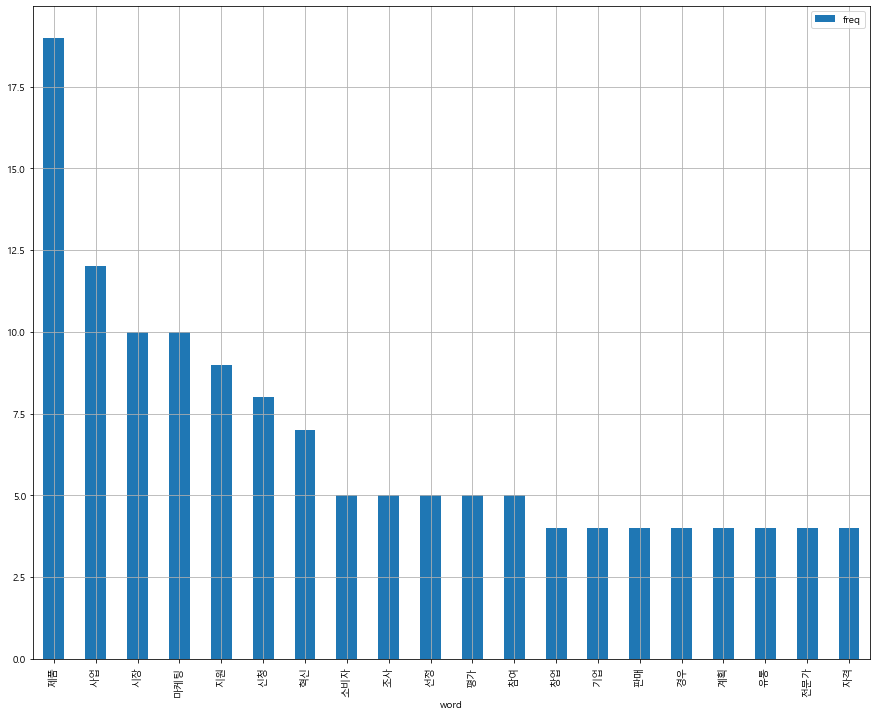

In [94]:
top_20.set_index('word').plot(kind='bar', figsize=(15,12))
plt.grid()

In [95]:
df_word['freq'].sum()

347

In [109]:
cnt_max=df_word['freq'].max()
cnt_max

19

In [110]:
res=[[]for i in range(cnt_max+1)]
res

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [112]:
df_word

,word,freq
0,제품,19
1,사업,12
2,시장,10
3,마케팅,10
4,지원,9
...,...,...
175,기간,1
176,구성,1
177,절차,1
178,최종,1


In [118]:
df_word['word'][0]

'제품'

In [96]:
percent=df_word['freq']/df_word['freq'].sum()
percent

0      0.054755
1      0.034582
2      0.028818
3      0.028818
4      0.025937
         ...   
175    0.002882
176    0.002882
177    0.002882
178    0.002882
179    0.002882
Name: freq, Length: 180, dtype: float64

In [97]:
tmp=df_word['freq']/len(df_word['word'])
tmp

0      0.105556
1      0.066667
2      0.055556
3      0.055556
4      0.050000
         ...   
175    0.005556
176    0.005556
177    0.005556
178    0.005556
179    0.005556
Name: freq, Length: 180, dtype: float64

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한 기업 실패 원인 중소기업 가장 애로 사항 판매 부진 아이디어 창업 기술 개발 통한 창조 혁신 제품 판로 소비자 사장 경우 중소기업청 초기 창조 혁신 제품 시장 진입 아이디어 사업 판로 순환 창조경제 생태계 구현 위해 마케팅 이노베이션 지원 사업 시행 계획 확정 발표 사업 계획 신청 접수 시작 마케팅 이노베이션 사업 규모 개사 제품 소비자 반응 조사 대형 유통 상품 기획 현장 전문가 선정 평가 선별 지원 선정 모든 제품 대해 소비자 전문가 평가 통한 시장 조사 실시 혁신 제품 대해 마케팅 전략 수립 제품 개선 지원 정부 보조금 지원 조건 우대 사항 정부 지원 금액 정부 보조금 비중 고시 장성 조사 소비자 전문가 평가 마케팅 전략 수립 업체 부담 제품 개선 업체 부담 이번 사업 주요 특징 그간 마케팅 사업 칸막이 지원 제품 중심 종합 마케팅 지원 시스템 마련 통해 혁신 제품 시장 진입 공률 고하 도록 또한 시장 혁신 제품 발굴 시장 조사 기반 선정 시스템 구축 아이디어 혁신 제품 유통 시장 소비자 만날 접근성 제품 대한 시장 조사 참여 기업 대해 제품 전용 판매 입점 기회 제공 혁신 제품 선정 마케팅 전략 수립 이행 경우 마케팅 사업 참여 자격 부여 마케팅 지원 사업 방안 테스트 마켓 시장 검증 인지도 해외진출 백화점 정책 매장 제품 판매 고속도로 휴게소 시장 평가 상품 검증 백화점 민간 유통 입점 홈쇼핑 무료 방송 온라인 판촉 홍보 제품 홍보 프라자 미국 인니 해외 홈쇼핑 진출 사업 신청 자격 중소기업 기본 규정 중소기업 제조 위탁 생산 소비재 완제 다음 신청 자격 충족 지원 제외 사항 해당 경우 신청 신청 자격 개월 이내 국내 시장 유통 입점 생활 주방 가전 멀티미디어 차량 용품 제품군 참고 제품군 생활 가전 주방 가전 기기 멀티미디어 차량 용품 조명 기기 가구 의료기기 유아 용품 스포츠 용품 다만 사업 목적 수입 제품 해외 위탁 생산 제품 제품 건설 자재 부품 중간 